In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.DataFrame({'Physics':[3,2,6],
        'Maths':[4,8,9]})

In [14]:
df

,Physics,Maths
0,3,4
1,2,8
2,6,9


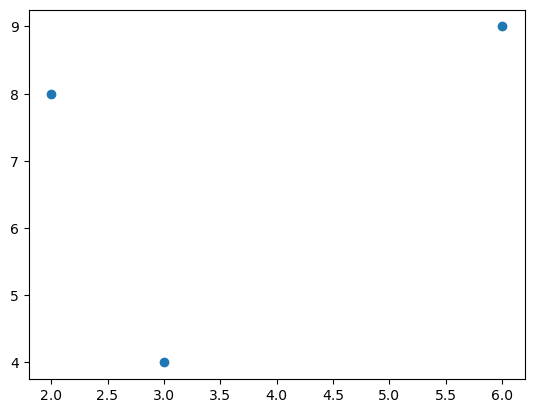

In [15]:
plt.scatter(x=df['Physics'], y=df['Maths'])

In [16]:
#makind data mean centric
Meanbycolumn = np.mean(df.T, axis=1)
print(Meanbycolumn)

Scaled_Data = df - Meanbycolumn


Physics    3.666667
Maths      7.000000
dtype: float64


In [17]:
df.T

,0,1,2
Physics,3,2,6
Maths,4,8,9


In [18]:
Scaled_Data

,Physics,Maths
0,-0.666667,-3.0
1,-1.666667,1.0
2,2.333333,2.0


In [19]:
#Find covariance matrix of above scaled data
Cov_mat = np.cov(Scaled_Data.T)
Cov_mat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [20]:
A=np.array([[4.33333333, 2.5],[2.5, 7.]])
print(np.linalg.eigh(A))
eigenvalues,eigenvectors = np.linalg.eig(A)


EighResult(eigenvalues=array([2.83333333, 8.5       ]), eigenvectors=array([[-0.85749293,  0.51449576],
       [ 0.51449576,  0.85749293]]))


In [21]:
#Find corresponding eigen value and eigen vector of above covariance matrix
print("eigenvalues:",eigenvalues)
print("eigenvectors:",eigenvectors)

eigenvalues: [2.83333333 8.5       ]
eigenvectors: [[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [22]:
#Get Original Data Projected to Principal components as new axis
Projected_data = eigenvectors.T.dot(Scaled_Data.T)
print(Projected_data.T)

[[-9.71825315e-01  2.91547595e+00]
 [ 1.94365063e+00 -5.04407627e-10]
 [-9.71825317e-01 -2.91547595e+00]]


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(df)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [24]:
pca.explained_variance_ratio_ #variance explanation ratio by each PC

array([0.75, 0.25])

In [25]:
#DataFrame for PC
PCDF = pd.DataFrame(data = pca.fit_transform(df), columns = ['PC1', 'PC2']) 

In [26]:
PCDF

,PC1,PC2
0,2.915476e+00,-0.971825
1,-6.866350e-16,1.943651
2,-2.915476e+00,-0.971825


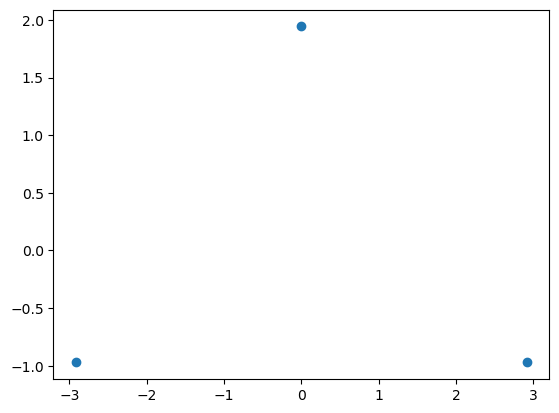

In [27]:
plt.scatter(PCDF["PC1"],PCDF["PC2"])

In [28]:
#inverse transform
pca.inverse_transform(pca.fit_transform(df))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])

In [29]:
#How much weight each variable has in principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=["Physics","Maths"])
loadings

,PC1,PC2
Physics,-0.514496,-0.857493
Maths,-0.857493,0.514496
